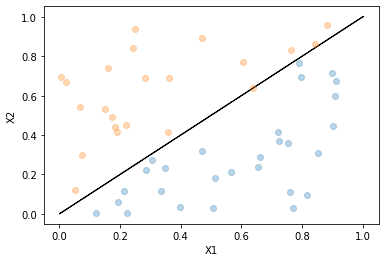

In [85]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp

X, y = geradataset(50)
plotadataset(X, y)
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plt.arrow(*[0,0], *hiperplano)
plt.show()

In [87]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.5
        self.maxiter = 200
    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            ypred = self.predict(X)
            erro = y - ypred
            custo = np.sum(erro**2)
            self.w = self.w + self.alpha*np.matmul(erro, X)
            if custo==0:
                break

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(perceptron.w)
sum(y == ypred)/len(y)

[ 16.66362353 -16.83466313]


1.0